In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [6]:
# Import the requests library.
import requests

In [7]:
# Import the API key.
from config1 import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ffad218efc3f56c20c9f18e980db1242


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | skagastrond
City not found. Skipping...
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | ntcheu
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | rafai
Processing Record 9 of Set 1 | temaraia
City not found. Skipping...
Processing Record 10 of Set 1 | chulym
Processing Record 11 of Set 1 | amderma
City not found. Skipping...
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | berlevag
Processing Record 14 of Set 1 | fushan
Processing Record 15 of Set 1 | omsukchan
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | olafsvik
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 

Processing Record 38 of Set 4 | yaan
Processing Record 39 of Set 4 | kuytun
Processing Record 40 of Set 4 | alice springs
Processing Record 41 of Set 4 | pisco
Processing Record 42 of Set 4 | kytmanovo
Processing Record 43 of Set 4 | tuktoyaktuk
Processing Record 44 of Set 4 | vanino
Processing Record 45 of Set 4 | tual
Processing Record 46 of Set 4 | benguela
Processing Record 47 of Set 4 | lasa
Processing Record 48 of Set 4 | dwarka
Processing Record 49 of Set 4 | humboldt
Processing Record 50 of Set 4 | praia
Processing Record 1 of Set 5 | balabac
Processing Record 2 of Set 5 | thompson
Processing Record 3 of Set 5 | guerrero negro
Processing Record 4 of Set 5 | hovd
Processing Record 5 of Set 5 | gondanglegi
Processing Record 6 of Set 5 | maragogi
Processing Record 7 of Set 5 | katsuura
Processing Record 8 of Set 5 | liverpool
Processing Record 9 of Set 5 | avarua
Processing Record 10 of Set 5 | salalah
Processing Record 11 of Set 5 | filingue
Processing Record 12 of Set 5 | luanda

City not found. Skipping...
Processing Record 32 of Set 8 | esperance
Processing Record 33 of Set 8 | coahuayana
Processing Record 34 of Set 8 | saint-henri-de-levis
City not found. Skipping...
Processing Record 35 of Set 8 | lavra
Processing Record 36 of Set 8 | noshiro
Processing Record 37 of Set 8 | kalmunai
Processing Record 38 of Set 8 | leh
Processing Record 39 of Set 8 | mikhaylovka
Processing Record 40 of Set 8 | san pedro
Processing Record 41 of Set 8 | uzhur
Processing Record 42 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 8 | tidore
City not found. Skipping...
Processing Record 44 of Set 8 | marzuq
Processing Record 45 of Set 8 | benjamin aceval
Processing Record 46 of Set 8 | nabire
Processing Record 47 of Set 8 | zhuanghe
Processing Record 48 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 49 of Set 8 | manggar
Processing Record 50 of Set 8 | rorvik
Processing Record 1 of Set 9 | qasigiannguit
Processing Record 2 of Set 9

Processing Record 21 of Set 12 | petropavl
Processing Record 22 of Set 12 | domoni
Processing Record 23 of Set 12 | dharchula
Processing Record 24 of Set 12 | miracema do tocantins
Processing Record 25 of Set 12 | auki
Processing Record 26 of Set 12 | zaozerne
Processing Record 27 of Set 12 | halalo
City not found. Skipping...
Processing Record 28 of Set 12 | poso
Processing Record 29 of Set 12 | kolodeznyy
Processing Record 30 of Set 12 | high level
Processing Record 31 of Set 12 | tammisaari
Processing Record 32 of Set 12 | belyy yar
Processing Record 33 of Set 12 | kerema
Processing Record 34 of Set 12 | koszeg
Processing Record 35 of Set 12 | caraballeda
Processing Record 36 of Set 12 | massaguet
Processing Record 37 of Set 12 | talara
Processing Record 38 of Set 12 | crab hill
City not found. Skipping...
Processing Record 39 of Set 12 | sobolevo
Processing Record 40 of Set 12 | aasiaat
Processing Record 41 of Set 12 | rio grande
Processing Record 42 of Set 12 | clemson
Processing 

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,49.66,62,75,10.36,AR,2022-04-20 19:49:36
1,Rikitea,-23.1203,-134.9692,78.57,72,2,19.04,PF,2022-04-20 19:49:37
2,Tasiilaq,65.6145,-37.6368,41.16,92,91,1.45,GL,2022-04-20 19:49:37
3,Kapaa,22.0752,-159.3190,78.78,76,20,16.11,US,2022-04-20 19:49:37
4,Ntcheu,-14.8203,34.6359,60.62,92,17,5.21,MW,2022-04-20 19:49:38
5,Albany,42.6001,-73.9662,52.18,40,8,1.99,US,2022-04-20 19:48:39
6,Rafai,4.9500,23.9167,69.84,97,100,0.72,CF,2022-04-20 19:49:38
7,Chulym,55.0997,80.9572,40.64,83,100,7.14,RU,2022-04-20 19:49:38
8,Berlevag,70.8578,29.0864,39.15,75,0,10.36,NO,2022-04-20 19:49:39
9,Fushan,37.4958,121.2581,54.30,78,0,7.99,CN,2022-04-20 19:49:39


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [18]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-04-20 19:49:36,-54.8000,-68.3000,49.66,62,75,10.36
1,Rikitea,PF,2022-04-20 19:49:37,-23.1203,-134.9692,78.57,72,2,19.04
2,Tasiilaq,GL,2022-04-20 19:49:37,65.6145,-37.6368,41.16,92,91,1.45
3,Kapaa,US,2022-04-20 19:49:37,22.0752,-159.3190,78.78,76,20,16.11
4,Ntcheu,MW,2022-04-20 19:49:38,-14.8203,34.6359,60.62,92,17,5.21
...,...,...,...,...,...,...,...,...,...
576,Abha,SA,2022-04-20 20:05:20,18.2164,42.5053,64.65,77,0,0.00
577,Krasni Okny,UA,2022-04-20 20:05:21,47.5404,29.4600,43.57,72,100,8.90
578,Antalaha,MG,2022-04-20 20:05:21,-14.9003,50.2788,75.49,97,100,10.96
579,Rawson,AR,2022-04-20 20:01:03,-43.3002,-65.1023,63.14,29,100,14.85


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

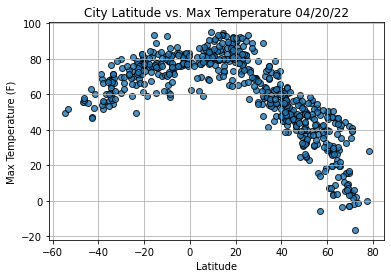

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

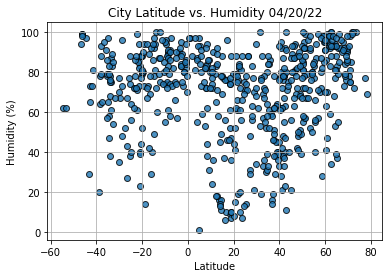

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

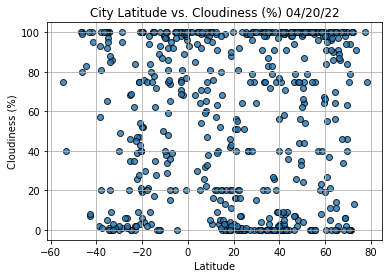

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

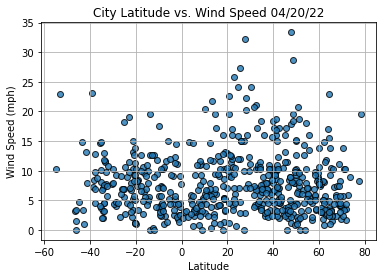

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                     Olafsvik
Country                        IS
Date          2022-04-20 19:49:40
Lat                       64.8945
Lng                      -23.7142
Max Temp                     44.8
Humidity                       88
Cloudiness                    100
Wind Speed                  13.76
Name: 13, dtype: object

In [28]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
576     True
577     True
578    False
579    False
580     True
Name: Lat, Length: 581, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Tasiilaq,GL,2022-04-20 19:49:37,65.6145,-37.6368,41.16,92,91,1.45
3,Kapaa,US,2022-04-20 19:49:37,22.0752,-159.3190,78.78,76,20,16.11
5,Albany,US,2022-04-20 19:48:39,42.6001,-73.9662,52.18,40,8,1.99
6,Rafai,CF,2022-04-20 19:49:38,4.9500,23.9167,69.84,97,100,0.72
7,Chulym,RU,2022-04-20 19:49:38,55.0997,80.9572,40.64,83,100,7.14


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

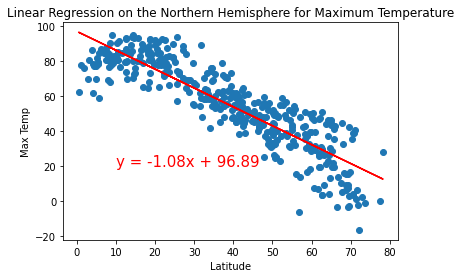

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,20))

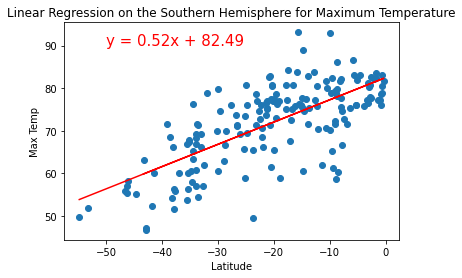

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

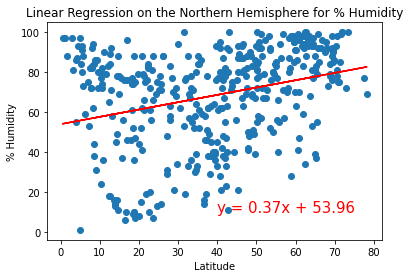

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

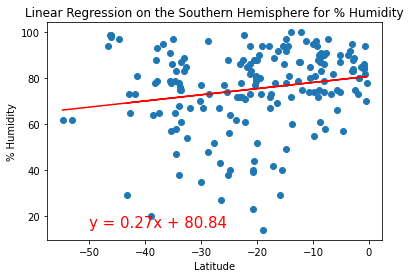

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

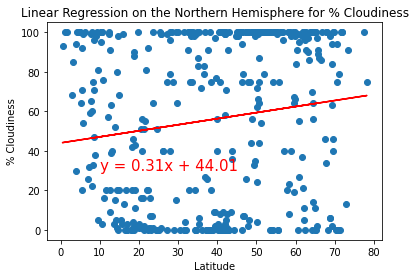

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,30))

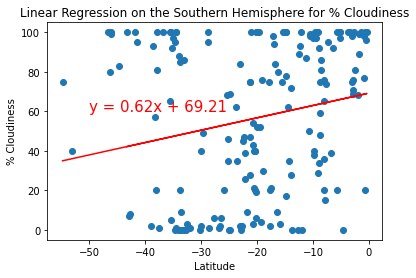

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

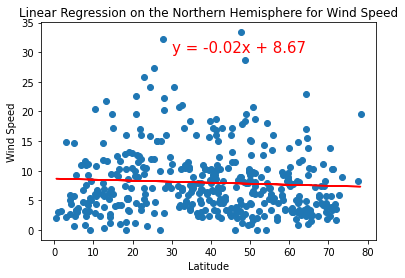

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(30,30))

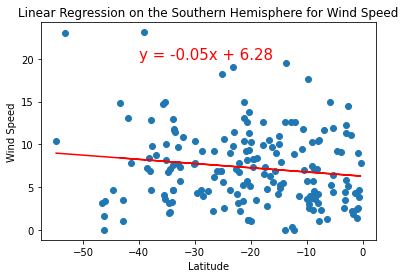

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-40,20))